## Importing the libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler

## Functions needed to perform this assignment

In [21]:
def load_data(file_path: str) -> pd.DataFrame:
    """Load data from CSV file"""
    return pd.read_csv(file_path)

# Data Cleaning Function
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
   
    # Copy dataframe to avoid modifying original
    df_cleaned = df.copy()
    
    # Handle missing values in numerical columns
    numerical_cols = ['Annual_income', 'Birthday_count', 'Employed_days']
    for col in numerical_cols:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())
    
    # Handle missing values in categorical columns
    categorical_cols = ['GENDER', 'Type_Occupation']
    for col in categorical_cols:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
    
    # Standardize numerical features
    scaler = StandardScaler()
    df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

      # Convert categorical to dummy variables
    categorical_cols = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 
                       'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
    df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)
    
    return df_cleaned

#Oversampling function
def perform_sampling(X: np.ndarray, y: np.ndarray, method: str = 'under'):
    
    if method == 'under':
        sampler = ClusterCentroids(random_state=42)
    else:
        sampler = RandomOverSampler(random_state=42)
    
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    return X_resampled, y_resampled


def train_and_evaluate_knn(X_train: np.ndarray, X_test: np.ndarray, 
                          y_train: np.ndarray, y_test: np.ndarray) -> tuple:
    """Train and evaluate KNN classifier"""
    # Calculate appropriate number of neighbors
    n_neighbors = min(110, len(y_train) // 2)  # Make sure we don't use more neighbors than samples
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print("KNN Results:")
    print(f"Number of neighbors used: {n_neighbors}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return knn, y_pred

def train_and_evaluate_logistic(X_train: np.ndarray, X_test: np.ndarray, 
                              y_train: np.ndarray, y_test: np.ndarray) -> tuple:
    """Train and evaluate Logistic Regression"""
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    print("Logistic Regression Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return lr, y_pred

def train_and_evaluate_svm(X_train: np.ndarray, X_test: np.ndarray, 
                          y_train: np.ndarray, y_test: np.ndarray) -> tuple:
   
    svm = SVC(kernel='linear', probability=True, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    print("SVM Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return svm, y_pred

def plot_roc_curves(models: dict, X_test: np.ndarray, y_test: np.ndarray):
    """Plot ROC curves for all models"""
    plt.figure(figsize=(10, 8))
    
    # Convert y_test to binary format for each class
    classes = np.unique(y_test)
    
    for name, model in models.items():
        # Calculate ROC curve and ROC area for each class
        y_pred_proba = model.predict_proba(X_test)
        
        for i, class_label in enumerate(classes):
            # Create binary labels for current class
            y_test_binary = (y_test == class_label).astype(int)
            
            # Get probabilities for current class
            y_pred_proba_class = y_pred_proba[:, i]
            
            # Calculate ROC curve
            fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba_class)
            roc_auc = auc(fpr, tpr)
            
            plt.plot(fpr, tpr, 
                    label=f'{name} - Class {class_label} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curves (One-vs-Rest)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def explore_data(df: pd.DataFrame):
    """Explore the dataset structure"""
    print("Dataset Shape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nSample of data:")
    print(df.head())
    print("\nData Info:")
    print(df.info())
    return df.columns.tolist()

### 1.
I created a clean_data funtion that removes null values from the datasets numerical columns, removes null values from the catgeorical columns, standardized the dataset, and converted categorical variables into dummy variables. These were improvements that I didn't make before in assignment 6 since I didnt know much about ways to clean data compared to now. I also, unrelatedley, changed up my def functions that I used for assignment 6 a little here to make it look cleaner and nicer. I recieved help from CS tutoring on editing the def functions to condense them and make them clearer.

In [39]:
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
   
    df_cleaned = df.copy()

    numerical_cols = ['Annual_income', 'Birthday_count', 'Employed_days']
    for col in numerical_cols:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())
    
    categorical_cols = ['GENDER', 'Type_Occupation']
    for col in categorical_cols:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

    scaler = StandardScaler()
    df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

    categorical_cols = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 
                       'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
    
    df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)
    
    return df_cleaned

### 2.
I performed oversampling for the credit card dataset that I used for assignment 6. I also showed class distributions before and after oversampling occured to help show the differences in the data. This is something that I recieved help on coding/understanding from CS tutoring. I chose to do oversampling because ita better for small datasets and because it helps the model learn the characteritsics of the minority class better. The minority class in this instance is (ask roashlyn). After performing oversampling as seen above, I noticed some changes between the accuracy scores of KNN and Logistic Regression. My KNN accuracy score before (Assignment 6) for me was about 0.96 or 96% rounded; however, after doing oversampling, my accuracy score dropped to 0.88 or 88% rounded. This shows that oversampling hurts the KNN model and reduced its score of predicting an outcome correctly. For Logistic Regression, my accuracy score before (Assignment 6) was also about 96% but after running oversampling, the accuracy score increased to 99% rounded. This shows that oversampling made the Logistic Regression accuracy higher in predicting an outcome.

In [35]:
print("Initial class distribution:")
print(y.value_counts())
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
print("\nPerforming oversampling...")
X_resampled, y_resampled = perform_sampling(X_train, y_train, method='over')
print(f"Original dataset shape: {X_train.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}")
    
print("\nClass distribution after sampling:")
print(pd.Series(y_resampled).value_counts())
    
print("\nTraining and evaluating models on resampled data...")
knn_model, knn_pred = train_and_evaluate_knn(X_resampled, X_test, y_resampled, y_test)
lr_model, lr_pred = train_and_evaluate_logistic(X_resampled, X_test, y_resampled, y_test)    

Initial class distribution:
CHILDREN
0     1091
1      305
2      134
3       16
4        1
14       1
Name: count, dtype: int64

Performing oversampling...
Original dataset shape: (1083, 44)
Resampled dataset shape: (4554, 44)

Class distribution after sampling:
CHILDREN
0     759
1     759
2     759
3     759
14    759
4     759
Name: count, dtype: int64

Training and evaluating models on resampled data...
KNN Results:
Number of neighbors used: 10
Accuracy: 0.8989

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       332
           1       0.74      0.80      0.77        90
           2       0.71      0.93      0.80        40
           3       0.50      0.33      0.40         3

    accuracy                           0.90       465
   macro avg       0.73      0.75      0.73       465
weighted avg       0.91      0.90      0.90       465

Logistic Regression Results:
Accuracy: 0.9935

Classification Report:


/opt/homebrew/Cellar/jupyterlab/4.2.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.
Each class for KNN and Logistic Regression represents labels assigned to data points based on the majority of their nearest neighbors. The AUC for the KNN classes are 0.98, 0.92, 0.98, and 0.67. For Logistic Regression, they are all 1.00.

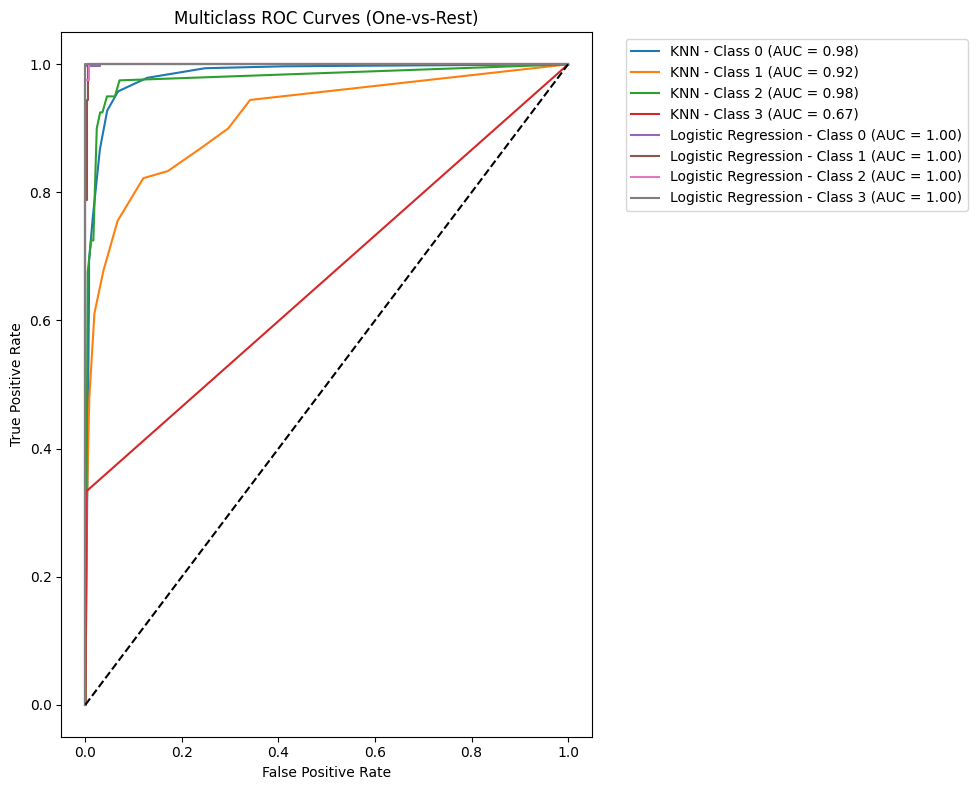

In [31]:
  # Plot ROC curves
models = {
        'KNN': knn_model,
        'Logistic Regression': lr_model,
    }
plot_roc_curves(models, X_test, y_test)

### 4.
The SVM Model performed very well, as the accuracy score was 0.9957. When compared to KNN and Logistic Regression, this supervised machine learning model was able to generate a higher accuracy score in comparison to the other two models. This shows that the SVM model is more reliable in predicting data points than Logistic Regression and KNN. But to be fair, all three supervised learning models work well.


In [34]:
svm_model, svm_pred = train_and_evaluate_svm(X_resampled, X_test, y_resampled, y_test)

SVM Results:
Accuracy: 0.9957

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.98      1.00      0.99        90
           2       1.00      0.97      0.99        40
           3       1.00      1.00      1.00         3

    accuracy                           1.00       465
   macro avg       0.99      0.99      0.99       465
weighted avg       1.00      1.00      1.00       465



### 5.
Outlier detection is the process of identifying data points that deviate significantly from the majority of the data. It's important because it helps identify data errors, improves model accuracy. and reveals unusual patterns. Some methods for outlier detection incllude statistical methods that involves calculuating the Z-score and IQR, Distance-based methods such as LOF, and visual methods by plotting the data points on to Box plots and Scatter plots.


